1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

By performing matrix multiplication between a (n, k) matrix A and a (k, m) matrix B, we get a (n.m) matrix C. It can be calculated by multiplying every 
i th element of row of matrix A with j th element of column of matrix B to get the element C[i][j] of matrix C.

There are total k elements in one row of matrix A. And each element should be multiplied by k elements of m columns of matrix B. There are n such rows in matrix A thus the total number of multiplications needed are (n*m*k).
 
We will get addition of k terms for (n*m) elements of resulting matrix C. So the number of additions for each element will be (k-1). Thu,s the total number of additions will be [(k-1)*n*m]. 

Additions required: [(k-1)*n*m]
Multiplications required: (n*m*k)

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [7]:
## Using list of lists
def matrix_multiplication(A, B):
    result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                result[i][j] += A[i][k] * B[k][j]
    return result

A = [[1, 2, 3], [4, 5, 6]]
B = [[7, 8], [9, 10], [11, 12]]

result_list_of_lists = matrix_multiplication(A, B)
print('Result using list of lists',result_list_of_lists)

## Using numpy
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[7, 8], [9, 10], [11, 12]])

result_numpy = np.dot(A, B)
print('Result using numpy',result_numpy)

import timeit

# Comparision of timing 
time_lol = timeit.timeit("matrix_multiplication(A, B)", globals=globals(), number=1000)

time_numpy = timeit.timeit("np.dot(A, B)", globals=globals(), number=1000)

print("Time taken for list of lists multiplication:", time_lol)
print("Time taken for numpy multiplication:", time_numpy)

Result using list of lists [[58, 64], [139, 154]]
Result using numpy [[ 58  64]
 [139 154]]
Time taken for list of lists multiplication: 0.00965259992517531
Time taken for numpy multiplication: 0.0010150999296456575


NumPy is faster than using python lists because NumPy uses C libraries for numerical operations. Therefore, as the size of matrix increases, the time difference becomes more and more noticable



3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?


In [34]:
import numpy as np
import time

def linear(arr):
    n = len(arr)
    for i in range(n // 2):
        maximum = max(arr)
        arr.remove(maximum)

    if n % 2 == 1:
        return max(arr)
    else:
        return (max(arr) + maximum) / 2


def sorting(arr):
    sorted_arr = sorted(arr)
    n = len(sorted_arr)
    return sorted_arr[n // 2] if n % 2 == 1 else (sorted_arr[n // 2 - 1] + sorted_arr[n // 2]) / 2

test = np.random.rand(10000).tolist()

# Compare performance
start_time = time.time()
result_linear = linear(test.copy())
end_time = time.time()

print(f"Linear approach result: {result_linear}")
print(f"Linear approach time: {end_time - start_time} seconds")

start_time = time.time()
result_sorting = sorting(test.copy())
end_time = time.time()

print(f"\nSorting approach result: {result_sorting}")
print(f"Sorting approach time: {end_time - start_time} seconds")

start_time = time.time()
result_numpy = np.median(test.copy())
end_time = time.time()

print(f"\nNumPy median result: {result_numpy}")
print(f"NumPy median time: {end_time - start_time} seconds")

Linear approach result: 0.4948704763770706
Linear approach time: 0.48341846466064453 seconds

Sorting approach result: 0.4948704763770706
Sorting approach time: 0.0016138553619384766 seconds

NumPy median result: 0.4948704763770706
NumPy median time: 0.0 seconds


4. What is the gradient of the following function with respect to x and y?
$$ x^2 y + y^3 Sin(x) $$

$$ Partial derivative of f(x,y) wrt x = $$ 2xy + (y^3)Cos(x) $$ 
$$ Partial derivative of f(x,y) wrt y = x^2 + 3(y^2)(Sin(x)) $$

Gradiant of f(x,y) = $$ [(2xy) + (y^3)Cos(x), (x^2) + 3(y^2)Sin(x)] $$ 
Gradient wrt x = $$ 2xy + (y^3)Cos(x) $$ 
Gradient wrt y = $$ x^2 + 3(y^2)(Sin(x)) $$

5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [35]:
import jax
import jax.numpy as jnp

def f(x, y):
    return (x**2) * y + (y**3) * jnp.sin(x)

grad_f = jax.grad(f, argnums=(0, 1))

x_val = 2.0
y_val = 3.0
jax_gradient = grad_f(x_val, y_val)
analytical_gradient = jnp.array([2*x_val*y_val + y_val**3*jnp.cos(x_val), x_val**2 + 3*y_val**2*jnp.sin(x_val)])

print("JAX Gradient:", jax_gradient)
print("Analytical Gradient:", analytical_gradient)

ModuleNotFoundError: jax requires jaxlib to be installed. See https://github.com/google/jax#installation for installation instructions.

6. Use sympy to confirm that you obtain the same gradient analytically.


In [21]:
import sympy as sp

x, y = sp.symbols('x y')

f = (x**2)*y + (y**3)*sp.sin(x)

grad_f_x = sp.diff(f, x)
grad_f_y = sp.diff(f, y)

print("Analytical Gradient with respect to x:", grad_f_x)
print("Analytical Gradient with respect to y:", grad_f_y)

Analytical Gradient with respect to x: 2*x*y + y**3*cos(x)
Analytical Gradient with respect to y: x**2 + 3*y**2*sin(x)


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

1. 2022
      1.Branch 1
          1.Roll Number: 1, Name: N, Marks:Maths: 100, English: 70 …
      2. Branch 2
2. 2023
        1. Branch 1
         2. Branch 2
3. 2024
        1. Branch 1
        2. Branch 2
4. 2025
        1. Branch 1
        2. Branch 2

In [23]:
students_data = {
    2022: {
        'Branch 1': {
            1: {'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}},
        },
        'Branch 2': {},
    },
    2023: {
        'Branch 1': {},
        'Branch 2': {},
    },
    2024: {
        'Branch 1': {},
        'Branch 2': {},
    },
    2025: {
        'Branch 1': {},
        'Branch 2': {},
    },
}

marks_of_student = students_data[2022]['Branch 1'][1]['Marks']
print(marks_of_student)

{'Maths': 100, 'English': 70}


8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [24]:
class Student:
    def __init__(self, name, roll_number, marks):
        self.name = name
        self.roll_number = roll_number
        self.marks = marks

class Branch:
    def __init__(self, name, students):
        self.name = name
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

class Database:
    def __init__(self, years):
        self.years = years

student1 = Student("John", "001", {"Math": 90, "Science": 85, "English": 88})
student2 = Student("Alice", "002", {"Math": 92, "Science": 88, "English": 90})
student3 = Student("Bob", "003", {"Math": 85, "Science": 80, "English": 82})

branch1 = Branch("Computer Science", [student1, student2])
branch2 = Branch("Electrical Engineering", [student3])

year1 = Year("First Year", [branch1, branch2])

database = Database([year1])


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

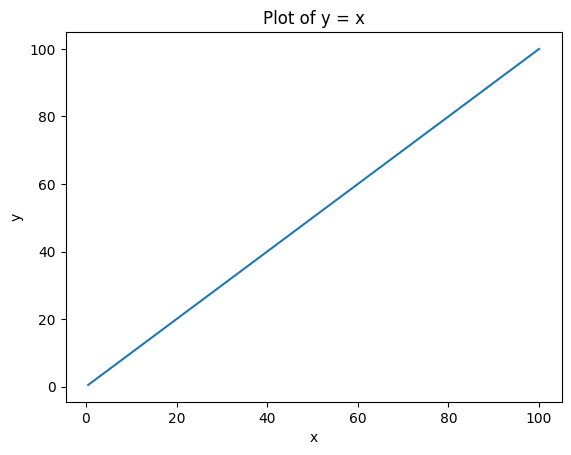

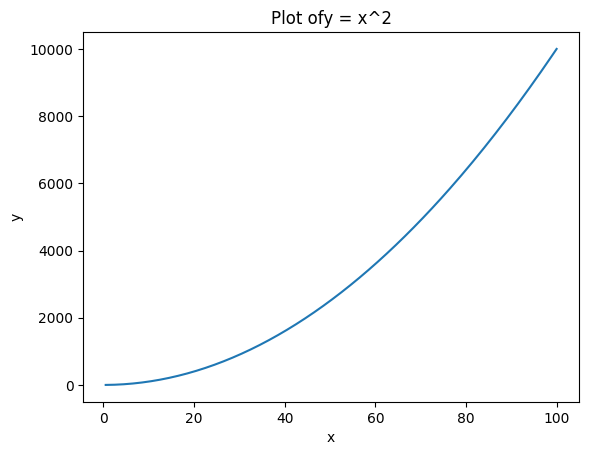

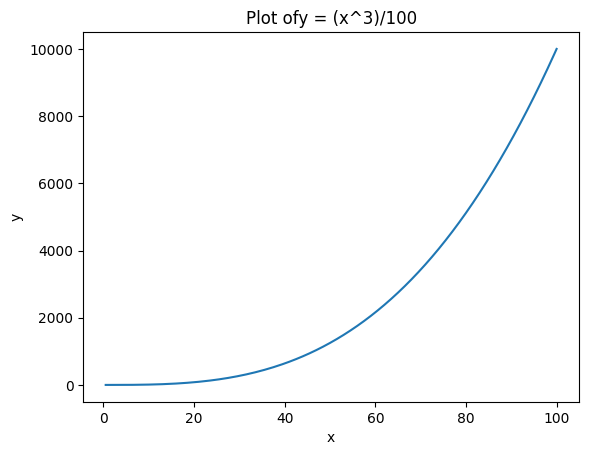

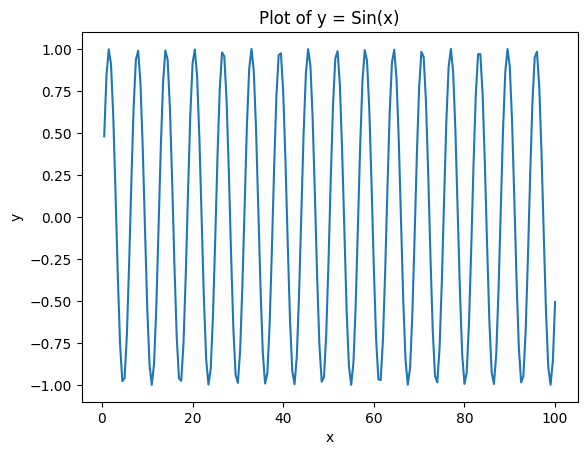

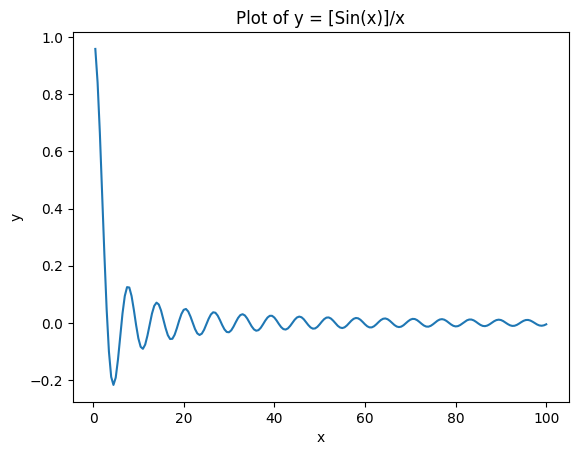

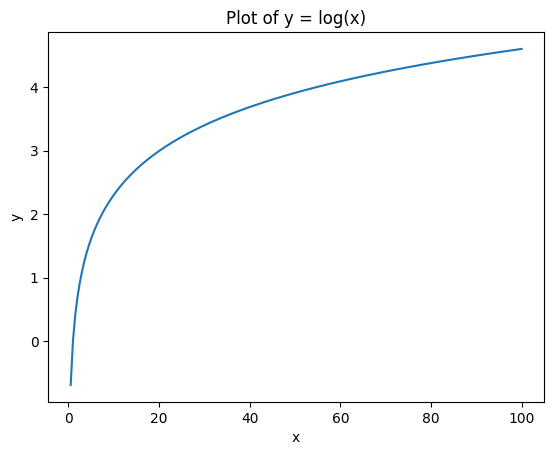

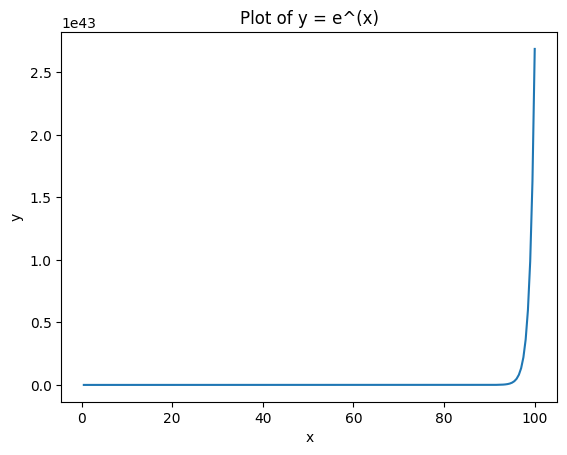

In [33]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.5, 100.5, 0.5)

## y = x
y = x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = x')
plt.show()

## y = x^2
y = x**2
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot ofy = x^2')
plt.show()

## y = (x^3)/100
y = (x**3)/100
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot ofy = (x^3)/100')
plt.show()

## y = Sin(x)
y = np.sin(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = Sin(x)')
plt.show()

## y = [Sin(x)]/x
y = np.sin(x)/x
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = [Sin(x)]/x')
plt.show()

## y = log(x)
y = np.log(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = log(x)')
plt.show()

## y = e^(x)
y = np.exp(x)
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of y = e^(x)')
plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [26]:
import numpy as np
import pandas as pd

data = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])

column_with_highest_std = df.std().idxmax()

row_with_lowest_mean = df.mean(axis=1).idxmin()

print(df)
print("Column with the highest standard deviation:", column_with_highest_std)
print("Row with the lowest mean:", row_with_lowest_mean)



           a         b         c         d         e
0   1.801401  1.912313  1.296730  1.545910  1.742034
1   1.473384  1.125149  1.943635  1.972984  1.455278
2   1.391059  1.068578  1.000437  1.562223  1.934517
3   1.436228  1.886307  1.686973  1.188784  1.340394
4   1.400705  1.593246  1.510099  1.780698  1.881696
5   1.719308  1.935114  1.060346  1.314380  1.135781
6   1.873728  1.969067  1.039230  1.360208  1.549930
7   1.896454  1.339797  1.800507  1.963343  1.127389
8   1.520718  1.019869  1.090441  1.113917  1.789449
9   1.729916  1.823563  1.597655  1.752663  1.958835
10  1.789716  1.155031  1.211442  1.922006  1.562590
11  1.163398  1.909380  1.022623  1.839923  1.572342
12  1.601378  1.702359  1.251335  1.621605  1.564093
13  1.925166  1.521238  1.379155  1.336897  1.407783
14  1.811355  1.201861  1.175835  1.711891  1.849547
15  1.394135  1.235169  1.737624  1.575822  1.597054
16  1.443117  1.262577  1.220605  1.033512  1.475519
17  1.398175  1.441507  1.178472  1.719149  1.

11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [30]:
import numpy as np
import pandas as pd

df['f'] = df['a'] + df['b'] + df['c'] + df['d'] + df['e']

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

num_rows_LT8 = df[df['g'] == 'LT8'].shape[0]

std_dev_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_dev_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()

print("Number of rows where the value in column 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of column 'f' for rows where the value in column 'g' is 'LT8':", std_dev_LT8)
print("Standard deviation of column 'f' for rows where the value in column 'g' is 'GT8':", std_dev_GT8)

Number of rows where the value in column 'g' is 'LT8': 16
Standard deviation of column 'f' for rows where the value in column 'g' is 'LT8': 0.4868356889548229
Standard deviation of column 'f' for rows where the value in column 'g' is 'GT8': 0.3405404270819008


12. Write a small piece of code to explain broadcasting in numpy.

In [31]:
import numpy as np

# Example arrays
A = np.array([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])

B = np.array([10, 20, 30])

# Broadcasting: Adding a 1D array to a 2D array
result = A + B

print("Array A:")
print(A)
print("\nArray B:")
print(B)
print("\nResult after broadcasting:")
print(result)

Array A:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array B:
[10 20 30]

Result after broadcasting:
[[11 22 33]
 [14 25 36]
 [17 28 39]]


Broadcasting in NumPy describes how NumPy treats arrays with different shapes during arithmetic operations. The smaller array is "broadcast" across the larger array to make their shapes compatible for element-wise operations.

13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.


In [32]:
import numpy as np

def compute_argmin(arr):
    min_index = np.argmin(arr)
    return min_index

# Test the function
arr = np.array([3, 7, 4, 1, 5, 9, 2, 6, 5, 3, 5])
print(compute_argmin(arr))

print(np.argmin(arr))

3
3
